In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from IPython.display import display
import random

# define Seaborn color palette to use
# colors = sns.color_palette("hls", 8)
colors = sns.color_palette("crest", 8)
cmap_colors = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# define the fig size of all figures
plt.rcParams["figure.figsize"] = (10,6)
# the directory to unzip the data in
data_directory_path = r"C:\Users\ADMIN\Desktop\Varun\Varun Thesis"

# Converting the days and hours from numbers to their interpretable form
days_of_week = {0: 'Saturday', 
                1: 'Sunday', 
                2: 'Monday',
                3: 'Tuesday',
                4: 'Wednesday',
                5: 'Thursday',
                6: 'Friday'}
hour_nums = list(range(24))
hours_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums}


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Unziping all dataset tables. Placing unzipped files in /kaggle/working/dataset directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        with zipfile.ZipFile(os.path.join(dirname, filename), 'r') as zip_ref:
            zip_ref.extractall(data_directory_path)

In [3]:
''' 
    iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
'''
def reduce_mem_usage(train_data):
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train_data.columns:
        col_type = train_data[col].dtype
        
        if col_type not in [object, 'category']:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')
    end_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data

# Annotate text on graph
def annotate_text(p, append_to_text='%'):
    for p in ax.patches:
        txt = str(p.get_height().round(2)) + append_to_text
        txt_x = p.get_x() + p.get_width()/2.
        txt_y = 0.92*p.get_height()
        ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')

In [4]:
# Reading the csv files into corresponding dataframes
# Then reduce their size to consume less memory
"""aisles = pd.read_csv('aisles.csv')
#aisles_df = reduce_mem_usage(aisles)

departments = pd.read_csv('departments.csv')
#departments_df = reduce_mem_usage(departments)

order_products_prior = pd.read_csv('order_products__prior.csv')
#order_products_prior_df = reduce_mem_usage(order_products_prior)"""

order_products_train = pd.read_csv('order_products__train.csv')
#order_products_train_df = reduce_mem_usage(order_products_train)

""" orders = pd.read_csv('orders.csv')
# Replacing numbers with their corresponding hour representation
orders['order_hour_of_day'] = orders['order_hour_of_day'].replace(to_replace=hours_of_day, value=None)
orders['order_hour_of_day'] = pd.Categorical(orders['order_hour_of_day'], 
                                             ordered=True, 
                                             categories=list(hours_of_day.values()))
# Replacing numbers with their corresponding day of week
# Define the categories of days of week sorted normally from Saturday to Friday
orders['order_dow'] = orders['order_dow'].replace(to_replace=days_of_week, value=None)
orders['order_dow'] = pd.Categorical(orders['order_dow'], 
                                     ordered=True, 
                                     categories=list(days_of_week.values()))
#orders_df = reduce_mem_usage(orders) """

products = pd.read_csv('products.csv')
#products_df = reduce_mem_usage(products)

In [5]:
df = pd.merge(order_products_train, products, on = 'product_id', how = 'right')

In [6]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,6695.0,1,7.0,1.0,Chocolate Sandwich Cookies,61,19
1,48361.0,1,9.0,0.0,Chocolate Sandwich Cookies,61,19
2,63770.0,1,4.0,0.0,Chocolate Sandwich Cookies,61,19
3,75339.0,1,9.0,0.0,Chocolate Sandwich Cookies,61,19
4,240996.0,1,3.0,1.0,Chocolate Sandwich Cookies,61,19


In [7]:
df.nunique()

order_id             131209
product_id            49688
add_to_cart_order        80
reordered                 2
product_name          49688
aisle_id                134
department_id            21
dtype: int64

In [8]:
df.shape

(1395182, 7)

In [9]:
df1 = df[['order_id', 'product_name']]

# Remove duplicate values from 'column1' and keep the first occurrence
df1 = df1.drop_duplicates(subset=['order_id'])

df['order_id'] = df['order_id'].astype('category')
df['order_id'] = df['order_id'].cat.codes

# Reset the index to have consecutive row numbers
df1 = df1.reset_index(drop=True)

In [10]:
df1.sample(5)

,order_id,product_name
7346,2264599.0,Cantaloupe
71925,2713094.0,Gluten Free Dark Chocolate Chunk Chewy with a ...
91734,483913.0,Apple Honeycrisp Organic
6540,1614501.0,Vegetable Pot Pie
124190,2869113.0,Banana


In [11]:
df1.shape

(131210, 2)

In [15]:
pip install pycaret --user

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached pandas-1.5.3-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached xxhash-3.3.0-cp38-cp38-win_amd64.whl (29 kB)
  Using cached numba-0.57.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached category_encoders-2.6.2-py2.py3-none-any.whl (81 kB)
  Using cached importlib_metadata-6.8.0-py3-none-any.whl (22 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
  Using cached imbalanced_learn-0.11.0-py3-non


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
pyclustertend 1.8.2 requires numba<0.55.0,>=0.54.1, but you have numba 0.57.1 which is incompatible.
pyc

In [19]:
import os
import sys
sys.path.append('C:\\Users\\ADMIN\\AppData\\Roaming\\Python\\Python38\\Scripts')
import pandas as pd
import plotly.express as px
from mlxtend.frequent_patterns import fpgrowth
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from pyECLAT import ECLAT
import time
#from pycaret.arules import *
import plotly.express as px
import numpy as np

In [20]:
print("The amount of transactions: ", len(df1))

The amount of transactions:  131210


# Association Rules

In [22]:
# Create an empty list to store the column values
column_list = []

# Loop over the values in the 'column_name' column and add them to the list
for value in df1['product_name']:
    my_list = value.split(",")
    column_list.append(my_list)

In [23]:
te = TransactionEncoder()
te_ary = te.fit(column_list).transform(column_list)
df_ = pd.DataFrame(te_ary, columns=te.columns_)
df_

,,Apricot & Banana Stage 2 Baby Food,& Baby Wipes,& Cheese Biscuit,& Cheese Croissant,& Cheese English Muffin,& Cheese Sandwiches,& Cheese Sauce,& Cheese Scramble,& Grape Ice Pops,...,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with a Splash of Pineapple Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131208,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


1. Apriori Algorithm
Python Generator: A Python generator is an iterator that generates values on-the-fly, allowing you to iterate over a sequence without storing all the values in memory at once. It is memory-efficient and useful for handling large datasets or when accessing values incrementally.

Image
mlxtend.apriori: The apriori function from mlxtend.frequent_patterns is a powerful tool for market basket analysis. It implements the Apriori algorithm and provides a simple interface for discovering frequent itemsets in transactional datasets. With customizable parameters and integration with the MLxtend library, apriori offers ease of use, flexibility, and good performance for market basket analysis tasks.

How to choose the min_support❔

Minimum Support: refers to the minimum frequency or occurrence threshold that an itemset or item must meet to be considered significant in a dataset. It is a parameter used in frequent itemset mining and association rule learning algorithms, determining the minimum level of popularity required for an itemset to be considered frequent.
min_support = (support_count of itemset) / (total number of transactions)

In [24]:
apriori(df_, min_support=0.01, use_colnames=True)

,support,itemsets
0,0.013139,(Bag of Organic Bananas)
1,0.012209,(Seedless Red Grapes)
2,0.011211,(Soda)
3,0.012049,(Yellow Onions)


In [36]:
apriori(df_, min_support=0.03, use_colnames=True)

,support,itemsets


In [27]:
apriori(df_, min_support=0.09, use_colnames=True)

,support,itemsets


🔍 As we increase the minimum support the less items we get. To have as much as info as possible, we will take min_support = 0.01

The number that we are trying here, were from a collection of a wider range. But for the sake of demonstration we tried on a specific range we know will give reasonable information

In [28]:
df_apriori = apriori(df_, min_support=0.01,  use_colnames=True)
df_apriori = df_apriori.sort_values('support', ascending=False)
df_apriori.head(120)

,support,itemsets
0,0.013139,(Bag of Organic Bananas)
1,0.012209,(Seedless Red Grapes)
3,0.012049,(Yellow Onions)
2,0.011211,(Soda)


As there is a stage as we increase the confidence the amount of item association doesn't matter, however at some point everything disappears

We will redo the code but in a demonstrative graphical and visual method

In [29]:
# try a variety of confidance to see the reaction
confidance_x =[]
size_association_y = []
for j in range(1, 601, 1):
    i = j / 1000.0  # Convert to the desired scale
    rule = association_rules(df_apriori, metric="confidence", min_threshold= i)
    length = len(rule)
    size_association_y.append(length)
    confidance_x.append(i)

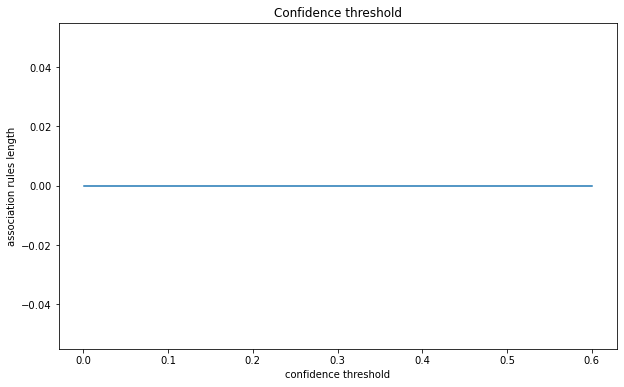

In [30]:
# Plotting the line graph
plt.plot(confidance_x , size_association_y)

# Adding labels and title
plt.xlabel('confidence threshold')
plt.ylabel('association rules length')
plt.title('Confidence threshold')

# Displaying the graph
plt.show()


What if we want the top 10 associations❔

We will find when the association rules length was 10, and at what confidence threshold this was.

ValueError: 26 is not in list

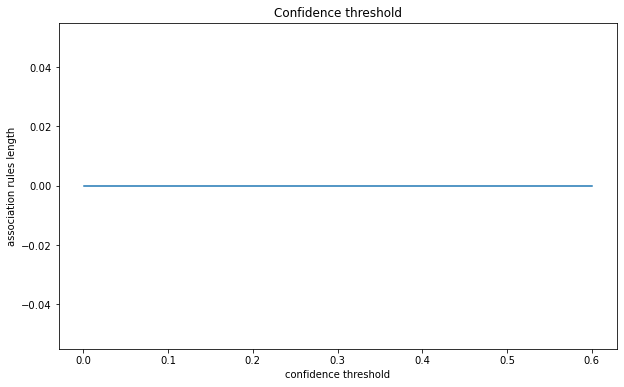

In [33]:
import matplotlib.pyplot as plt

# Plotting the line graph
plt.plot(confidance_x , size_association_y)

# Adding labels and title
plt.xlabel('confidence threshold')
plt.ylabel('association rules length')
plt.title('Confidence threshold')

# Find corresponding x for a given y
target_y = 26
closest_value = min(size_association_y, key=lambda x: abs(x - target_y))
corresponding_x = confidance_x[size_association_y.index(target_y)]

# Plot a point for the corresponding x and y values
plt.plot(corresponding_x, target_y, 'ro', label='Target Y')
# Add lines that reach the axis
plt.axhline(y=target_y, color='gray', linestyle='--')
plt.axvline(x=corresponding_x, color='gray', linestyle='--')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [34]:
rule_APRIORI = association_rules(df_apriori, metric="confidence", min_threshold= 0.09)
rule_APRIORI

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [35]:
plot_model(rule_APRIORI, plot = '2d')

NameError: name 'plot_model' is not defined

In [ ]:
plot_model(rule_APRIORI, plot = '3d')

# 2. FP-Growth Algorithm

In [37]:
fp_growth_df = fpgrowth(df_, min_support=0.01, use_colnames=True)
fp_growth_df

,support,itemsets
0,0.011211,(Soda)
1,0.012049,(Yellow Onions)
2,0.012209,(Seedless Red Grapes)
3,0.013139,(Bag of Organic Bananas)


In [38]:
rule_FP = association_rules(fp_growth_df, metric="confidence", min_threshold= 0.09)
rule_FP

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [39]:
plot_model(rule_FP, plot = '2d')

NameError: name 'plot_model' is not defined

In [ ]:
plot_model(rule_FP, plot = '3d')

 Results are different than apriori

The output of FP-Growth and Apriori algorithms can differ due to their underlying principles and techniques:
FP-Growth uses an efficient tree-based data structure called FP-Tree and does not generate candidate itemsets explicitly.
Apriori generates candidate itemsets and requires multiple passes over the transaction data.
FP-Growth is generally faster and more suitable for large datasets compared to Apriori.
The differences in approach can lead to variations in the frequent itemsets discovered and their corresponding support values.
Consider the specific requirements, dataset size, and computational resources when choosing between FP-Growth and Apriori for market basket analysis.

# 3. Eclat Algorithm

ECLAT (Equivalence Class Clustering and Bottom-up Lattice Traversal) is an efficient algorithm for frequent itemset mining in transactional datasets. It works by exploiting the vertical data format, where transactions are represented as sets of items.

The steps involved in the ECLAT algorithm are as follows:

Vertical Representation: Convert the transactional dataset into a vertical representation, where each item is associated with the set of transactions in which it appears.

Initialization: Initialize an empty set called the "prefix" to store the current frequent itemsets.

Recursive Process:

Start with a single item as the prefix and count its support by scanning the database.
If the support of the prefix is above a specified minimum support threshold, it is considered a frequent itemset.
Add the frequent itemset to the list of frequent itemsets.
Generate a new prefix by combining the frequent itemset with the remaining items.
Recursively repeat the process with the new prefix until no more frequent itemsets can be generated.
Combining Frequent Itemsets: Combine the frequent itemsets obtained in the previous step to form larger itemsets. This is done by finding the intersections of their transactions.

Repeat: Repeat the recursive process with the combined frequent itemsets to find larger itemsets until no more frequent itemsets can be generated.

Termination: Stop the process when no more frequent itemsets can be found.

Output: Return the list of all frequent itemsets that meet the minimum support threshold.

However, it may perform poorly on sparse datasets or datasets with long transactions

In [ ]:
dataset = pd.DataFrame(column_list).head(500)
dataset

In [ ]:
# loading transactions DataFrame to ECLAT class
eclat = ECLAT(data=dataset)
# DataFrame of binary values
eclat.df_bin

In [ ]:
# count items in each column
items_total = eclat.df_bin.astype(int).sum(axis=0)
items_total

In [ ]:
# count items in each row
items_per_transaction = eclat.df_bin.astype(int).sum(axis=1)
items_per_transaction

In [ ]:
# Loading items per column stats to the DataFrame
df = pd.DataFrame({'items': items_total.index, 'transactions': items_total.values}) 
# cloning pandas DataFrame for visualization purpose  
df_table = df.sort_values("transactions", ascending=False)
#  Top 5 most popular products/items
df_table.head(5).style.background_gradient(cmap='Blues')

In [ ]:
# to have a same origin
df_table["all"] = "Tree Map" 
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='transactions',
                  color=df_table["transactions"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

In [ ]:
# Start the timer
start_time = time.time()

# the item shoud appear at least at 1% of transactions
min_support = 0.01
# start from transactions containing at least 2 items
min_combination = 2
rule_indices, rule_supports = eclat.fit(min_support=min_support,
                                                 min_combination=min_combination,
                                                 max_combination=2,
                                                 separator=' & ',
                                                 verbose=True)

elapsed_eclat = time.time() - start_time

In [ ]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'support'])
result.sort_values(by=['support'], ascending=False)

The time is sooo long! and said out of memory... this is why we only made it work on 500 products

Possible reasons:

There are so many products that the vertical flipping is not the right choice
Apriori and FP-growth in the mlxtend is very optimized and uses generators and other technologies to make it faster

# 4. Comparing performance and Accuracy of Association rules

Complexity Analysis (the literature)
Apriori Algorithm Complexity
Time Complexity:
Generating frequent itemsets: O(n^2 * 2^m), where n is the number of transactions and m is the average number of items per transaction.
Generating association rules: O(2^m)
Space Complexity: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
FP-growth Algorithm Complexity
Time Complexity:
Building the FP-tree: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
Mining frequent itemsets: O(2^m)
Space Complexity: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
Eclat Algorithm Complexity
Time Complexity:
Building the vertical database: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
Mining frequent itemsets: O(3^m)
Space Complexity: O(n * m), where n is the number of transactions and m is the average number of items per transaction.
📝 We will only measure the time taken for processing intracart, as we are comparing on this data, and what suits it more.

In [ ]:
# Start the timer
start_time = time.time()

df_apriori = apriori(df_, min_support=0.01)
rule_apriori = association_rules(df_apriori, metric="confidence", min_threshold= 0.09)

# Calculate the elapsed time
elapsed_time_apriori = time.time() - start_time

In [ ]:
# Start the timer
start_time = time.time()

fp_growth_df = fpgrowth(df_, min_support=0.01, use_colnames=True)
rule_fp_growth = association_rules(fp_growth_df, metric="confidence", min_threshold= 0.09)

# Calculate the elapsed time
elapsed_time_fp_growth = time.time() - start_time

In [ ]:
x = ["apriori", "fp-growth", "eclat of 500 transactions"]
y = [elapsed_time_apriori, elapsed_time_fp_growth, elapsed_eclat]

plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("time in sec")
plt.title("Time Complexity")
plt.show()

FP- growth seems the most suitable for this data in terms of speed!

Accuracy by comparing the support, lift, confidence, conviction and leverage

In [ ]:
# Calculate metrics
support_apriori = rule_apriori["support"]
confidence_apriori = rule_apriori["confidence"]
lift_apriori = rule_apriori["lift"]

support_fpgrowth =rule_fp_growth["support"]
confidence_fpgrowth = rule_fp_growth["confidence"]
lift_fpgrowth = rule_fp_growth["lift"]

support_eclat = result["support"] 
#confidence_eclat = rules_eclat["confidence"]
#lift_eclat = rules_eclat["lift"]

Support
Support measures the frequency of occurrence of an itemset in the dataset. It indicates how popular or common an itemset is within the transactions.

In [ ]:
# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["support"]  # y-axis values for DataFrame 1
y2 = rule_fp_growth["support"]  # y-axis values for DataFrame 2
y3 = result["support"].head(11)


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')
plt.plot(x, y3, label='ECLAT')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of support')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [ ]:
# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["support"].sort_values()  # y-axis values for DataFrame 1
y2 = rule_fp_growth["support"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of support')

# Add a legend
plt.legend()

# Display the graph
plt.show()

Lift
Lift measures the strength of association between the antecedent and consequent of a rule, taking into account the support of the rule and the individual supports of the antecedent and consequent.

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["lift"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["lift"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of lift')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["lift"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["lift"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of lift')

# Add a legend
plt.legend()

# Display the graph
plt.show()

Confidence
Confidence measures the reliability or certainty of a rule. It represents the conditional probability of finding the consequent given the antecedent.

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["confidence"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["confidence"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of confidence')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["confidence"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["confidence"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of confidence')

# Add a legend
plt.legend()

# Display the graph
plt.show()

Conviction
Conviction measures the implication strength of a rule by comparing the expected and observed support of the consequent. It indicates the extent to which the rule is dependent on the antecedent.

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["conviction"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["conviction"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of conviction')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["conviction"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["conviction"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of conviction')

# Add a legend
plt.legend()

# Display the graph
plt.show()

Leverage
Leverage measures the difference between the observed and expected support of the rule. It indicates how much the occurrence of the antecedent and consequent together deviates from what would be expected if they were independent.

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["leverage"] # y-axis values for DataFrame 1
y2 = rule_fp_growth["leverage"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of leverage')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(rule_apriori)+1)]  # x-axis values
y1 = rule_apriori["leverage"].sort_values() # y-axis values for DataFrame 1
y2 = rule_fp_growth["leverage"].sort_values()  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('association')
plt.ylabel('Value')
plt.title('Comparison of leverage')

# Add a legend
plt.legend()

# Display the graph
plt.show()


4. Conclusion
FP - Growth is the fastest
FP-growth and apriori lead to the same average lift, support, confidence.
The eclat algorithm is extrememly slow. 10 transactions take 10 times the time of all the transactions compared to apriori or fp-growth